In [18]:
import numpy as np #PAra algebra lineal
import pandas as pd #Procesamiento de datos
import matplotlib.pyplot as plt #Graficar
import seaborn as sns #Visualizar datos
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
#Preprocesamiento de datos.
from sklearn.preprocessing import MinMaxScaler

#Librerias de Redes Neuronales
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Métricas de Validación

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [136]:
dfTrain = pd.read_csv("train.csv")
dfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [137]:
dfTest = pd.read_csv("test.csv")
dfTest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [138]:
labels = ['Cheap', 'Mid', 'Expensive']

dfTrain['SalePrice'] = pd.cut(dfTrain['SalePrice'], 3, labels=labels)

dfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Cheap
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Cheap
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Cheap
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Cheap
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,Cheap
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,Cheap
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,Cheap
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,Cheap


In [139]:
dfTrain.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [140]:
mapping = {'Cheap': 1, 'Mid': 2, 'Expensive': 3}
dfTrain['SalePrice'] = dfTrain['SalePrice'].map(mapping)

In [141]:
df = pd.concat([dfTrain, dfTest], sort=False)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [142]:
dfNC = df.select_dtypes(include=['int64', 'float64']).columns

In [143]:
scaler = StandardScaler()
df[dfNC] = scaler.fit_transform(df[dfNC])

In [144]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.731458,0.067331,RL,-0.184481,-0.217879,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-1.552184,0.157646,WD,Normal,1
1,-1.730271,-0.873616,RL,0.458190,-0.072044,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-0.446925,-0.602962,WD,Normal,1
2,-1.729084,0.067331,RL,-0.055946,0.137197,Pave,NaN,IR1,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,1.026753,0.157646,WD,Normal,1
3,-1.727897,0.302568,RL,-0.398704,-0.078385,Pave,NaN,IR1,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-1.552184,-1.363569,WD,Abnorml,1
4,-1.726711,0.067331,RL,0.629569,0.518903,Pave,NaN,IR1,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,2.132012,0.157646,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.726711,2.419700,RM,-2.069648,-1.043937,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-0.078505,-1.363569,WD,Normal,NaN
1455,1.727897,2.419700,RM,-2.069648,-1.049263,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-0.815344,-1.363569,WD,Abnorml,NaN
1456,1.729084,-0.873616,RL,3.885767,1.246808,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,1.026753,-1.363569,WD,Abnorml,NaN
1457,1.730271,0.655424,RL,-0.313015,0.034605,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,MnPrv,Shed,1.144312,0.289914,-1.363569,WD,Normal,NaN


### X_train

In [145]:
qMapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
eMapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}
fMapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1}
gfMapping = {'Fin': 3, 'RFn': 2, 'Unf': 1}
pdMapping = {'Y': 3, 'P': 2, 'N': 1}
fpMapping = {"Ex":6,"Gd":5,"TA":4,"Fa":3,"Po":2,"NA":1}

oFeatures = {
    'ExterQual': qMapping, 'ExterCond': qMapping,
    'BsmtQual': qMapping, 'BsmtCond': qMapping,
    'BsmtFinType1': fMapping, 'BsmtFinType2': fMapping,
    'HeatingQC': qMapping,
    'KitchenQual': qMapping,
    'GarageFinish': gfMapping,
    'GarageQual': qMapping, 'GarageCond': qMapping,
    'PavedDrive': pdMapping,
    'FireplaceQu' : fpMapping
}

for f, m in oFeatures.items():
    df[f] = df[f].map(m)

nominals = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'SaleType'
]

dfEncoded = pd.get_dummies(df, columns=nominals, drop_first=True)

In [146]:
dfEncoded.shape

(2919, 198)

In [147]:
for i in dfEncoded.columns:
    if dfEncoded[i].dtypes == "object":
        print(i)

Alley
RoofStyle
BsmtExposure
PoolQC
Fence
MiscFeature
SaleCondition


In [148]:
dfEncoded.drop([
    "Alley","PoolQC","Fence","MiscFeature","OverallCond","Id",
    "MiscVal","YrSold","3SsnPorch","LowQualFinSF","SaleCondition",
    "RoofStyle","BsmtUnfSF","BsmtFinSF1","BsmtFinSF2","BsmtExposure"
],axis=1,inplace=True)

In [149]:
dfEncoded.dropna(inplace=True)

In [150]:
dfEncoded.isnull().sum()

MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
YearBuilt         0
                 ..
SaleType_ConLI    0
SaleType_ConLw    0
SaleType_New      0
SaleType_Oth      0
SaleType_WD       0
Length: 182, dtype: int64

In [151]:
X = dfEncoded.drop('SalePrice', axis = 1)
y = dfEncoded["SalePrice"]

In [152]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1,-0.873616,0.458190,-0.072044,-0.063185,0.154764,-0.395604,-0.569991,3,3,4.0,...,False,False,False,False,False,False,False,False,False,True
2,0.067331,-0.055946,0.137197,0.646183,0.980221,0.848965,0.333506,4,3,4.0,...,False,False,False,False,False,False,False,False,False,True
3,0.302568,-0.398704,-0.078385,0.646183,-1.859351,-0.682812,-0.569991,3,3,3.0,...,False,True,False,False,False,False,False,False,False,True
4,0.067331,0.629569,0.518903,1.355551,0.947203,0.753229,1.382009,4,3,4.0,...,False,False,False,False,False,False,False,False,False,True
6,-0.873616,0.243967,-0.010667,1.355551,1.079276,0.992569,0.467357,4,3,5.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.067331,0.458190,-0.021319,1.355551,0.782111,0.561757,1.872797,4,3,4.0,...,False,False,False,False,False,False,False,False,False,True
1451,-0.873616,0.372501,-0.114907,1.355551,1.211349,1.184041,0.511974,4,3,4.0,...,False,False,False,False,False,False,False,True,False,False
1455,0.067331,-0.313015,-0.285470,-0.063185,0.914184,0.753229,-0.569991,3,3,4.0,...,False,False,False,False,False,False,False,False,False,True
1456,-0.873616,0.672414,0.381311,-0.063185,0.220801,0.178812,0.093689,3,3,4.0,...,False,False,False,False,False,False,False,False,False,True


In [153]:
y

1       1
2       1
3       1
4       1
6       2
       ..
1447    1
1451    2
1455    1
1456    1
1457    1
Name: SalePrice, Length: 584, dtype: category
Categories (3, int64): [1 < 2 < 3]

### Separamos la data

In [154]:
#Lo convertimos en un lista de numpy
X = np.array(X)
y = np.array(y)

### Dividimos en entrenamiento y prueba

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [156]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(467, 181) (117, 181) (467,) (117,)


### Escalamos la data

In [157]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# 3. Construimos, compilamos y ajustamos el modelo
### Para SalePrice categorizado


### Empezamos a construir

In [195]:
model = Sequential() #Para construir la red de manera simple.
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) #1000 neuronas, 
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) #Nodo de salida
model.summary() # Ver la arquitectura del modelo

c:\Users\josea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 1000)           │       182,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │           753 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 808,503 (3.08 MB)

 Trainable params: 808,503 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 512)            │        93,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,795 (1007.01 KB)

 Trainable params: 257,795 (1007.01 KB)

 Non-trainable params: 0 (0.00 B)

### Compilamos el modelo

In [196]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [197]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=100,
                   restore_best_weights = True)

### Ajsutamos el modelo

In [198]:
X_train.dtype
y_train.dtype

X_train

array([[0.29411765, 0.13356164, 0.02584693, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.26369863, 0.04564418, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.19520548, 0.03961323, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.23529412, 0.15068493, 0.05771545, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.15068493, 0.02487767, ..., 0.        , 0.        ,
        1.        ],
       [0.17647059, 0.09931507, 0.03726266, ..., 0.        , 0.        ,
        1.        ]])

In [162]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)


Epoch 1/5000


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6877 - mae: 1.1985 - val_loss: 0.0886 - val_mae: 0.2303
Epoch 2/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1192 - mae: 0.2528 - val_loss: 0.4066 - val_mae: 0.5725
Epoch 3/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1998 - mae: 0.3435 - val_loss: 0.0991 - val_mae: 0.2405
Epoch 4/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1654 - mae: 0.3070 - val_loss: 0.1209 - val_mae: 0.2744
Epoch 5/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1507 - mae: 0.3071 - val_loss: 0.0752 - val_mae: 0.2099
Epoch 6/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0790 - mae: 0.2042 - val_loss: 0.3343 - val_mae: 0.5189
Epoch 7/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1871 - mae: 0.3387 - val_loss: 0.2254 - val_mae: 0.4023
Epoch 8/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1407 - mae: 0.2857 - val_loss: 0.0839 - val_mae: 0.1895
Epoch 9/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1013 -

### Graficamos

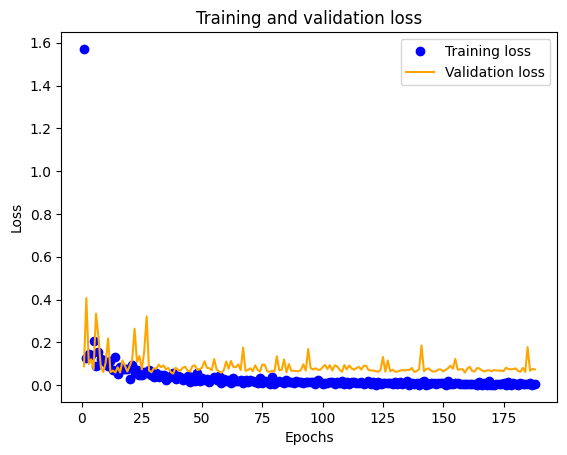

In [163]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # Numero de Epochs, para X
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


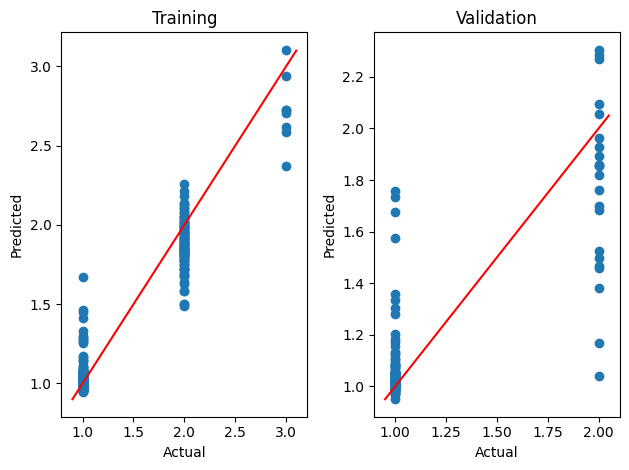

In [164]:
fig, axes = plt.subplots(1,2) # 1 fila, dos columnas


# Entrenamiento
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# Linea de 45 grados
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validacion
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# Linea de 45 grados
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')
# Pequeña separación entre gráficas.
fig.tight_layout()




# 4. Predecimos

In [165]:

pred = model.predict(X_test)
pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


array([[1.1699519 ],
       [1.675304  ],
       [1.0091943 ],
       [1.6821682 ],
       [0.98607355],
       [2.0932827 ],
       [1.1724921 ],
       [1.0731723 ],
       [1.0239606 ],
       [0.98380095],
       [2.2849028 ],
       [2.0574815 ],
       [1.3587437 ],
       [1.0130223 ],
       [1.0298998 ],
       [1.0832664 ],
       [1.3823937 ],
       [2.3047469 ],
       [1.0300275 ],
       [1.0813184 ],
       [0.9917671 ],
       [1.76252   ],
       [1.0497476 ],
       [1.8177426 ],
       [1.121001  ],
       [1.016896  ],
       [1.8926557 ],
       [1.0528204 ],
       [1.0058191 ],
       [1.0468525 ],
       [0.96611226],
       [1.1840873 ],
       [1.0354774 ],
       [0.9803583 ],
       [1.9273262 ],
       [0.9951978 ],
       [1.0024891 ],
       [1.011786  ],
       [1.0522128 ],
       [1.964755  ],
       [1.0209665 ],
       [1.0149134 ],
       [1.056983  ],
       [2.2702951 ],
       [1.0707996 ],
       [0.9841429 ],
       [1.0569559 ],
       [1.154

# 5. Métricas

In [166]:


trainpreds = model.predict(X_train)

print("MAE Entrenamiento: ",mean_absolute_error(y_train, trainpreds)) # Entrenamiento
print("MAE Prueba: ",mean_absolute_error(y_test, pred)) # Prueba

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE Entrenamiento:  0.06796830445847113
MAE Prueba:  0.12641570201286903


In [167]:
mse = mean_squared_error(y_test, pred)
print("MSE: ",mse)

MSE:  0.05379252027204667


In [168]:
r2 = r2_score(y_test, pred)
print("R²: ", r2)


R²:  0.6476718612420828


## RED NEURONAL PARA SALE Price sin categorizar

In [170]:
dfTrain = pd.read_csv("train.csv")
dfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [171]:
dfTest = pd.read_csv("test.csv")
dfTest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [172]:
df = pd.concat([dfTrain, dfTest], sort=False)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [ ]:
dfNC = df.select_dtypes(include=['int64', 'float64']).columns

In [173]:
scaler = StandardScaler()
df[dfNC] = scaler.fit_transform(df[dfNC])

In [175]:
qMapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
eMapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}
fMapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1}
gfMapping = {'Fin': 3, 'RFn': 2, 'Unf': 1}
pdMapping = {'Y': 3, 'P': 2, 'N': 1}
fpMapping = {"Ex":6,"Gd":5,"TA":4,"Fa":3,"Po":2,"NA":1}

oFeatures = {
    'ExterQual': qMapping, 'ExterCond': qMapping,
    'BsmtQual': qMapping, 'BsmtCond': qMapping,
    'BsmtFinType1': fMapping, 'BsmtFinType2': fMapping,
    'HeatingQC': qMapping,
    'KitchenQual': qMapping,
    'GarageFinish': gfMapping,
    'GarageQual': qMapping, 'GarageCond': qMapping,
    'PavedDrive': pdMapping,
    'FireplaceQu' : fpMapping
}

for f, m in oFeatures.items():
    df[f] = df[f].map(m)

nominals = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'SaleType'
]

dfEncoded = pd.get_dummies(df, columns=nominals, drop_first=True)

In [176]:
for i in dfEncoded.columns:
    if dfEncoded[i].dtypes == "object":
        print(i)

Alley
RoofStyle
BsmtExposure
PoolQC
Fence
MiscFeature
SaleCondition


In [177]:
dfEncoded.drop([
    "Alley","PoolQC","Fence","MiscFeature","OverallCond","Id",
    "MiscVal","YrSold","3SsnPorch","LowQualFinSF","SaleCondition",
    "RoofStyle","BsmtUnfSF","BsmtFinSF1","BsmtFinSF2","BsmtExposure"
],axis=1,inplace=True)

In [178]:
dfEncoded.dropna(inplace=True)

In [179]:
dfEncoded.isnull().sum()

MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
YearBuilt         0
                 ..
SaleType_ConLI    0
SaleType_ConLw    0
SaleType_New      0
SaleType_Oth      0
SaleType_WD       0
Length: 182, dtype: int64

In [180]:
X = dfEncoded.drop('SalePrice', axis = 1)
y = dfEncoded["SalePrice"]

In [181]:
#Lo convertimos en un lista de numpy
X = np.array(X)
y = np.array(y)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [183]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(467, 181) (117, 181) (467,) (117,)


In [184]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [185]:
model = Sequential() #Para construir la red de manera simple.
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) #1000 neuronas, 
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) #Nodo de salida
model.summary() # Ver la arquitectura del modelo

c:\Users\josea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1000)           │       182,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 808,001 (3.08 MB)

 Trainable params: 808,001 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

In [186]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [187]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [188]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)


Epoch 1/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 54526119936.0000 - mae: 216902.3281 - val_loss: 54577205248.0000 - val_mae: 219258.7031
Epoch 2/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58907410432.0000 - mae: 220270.5469 - val_loss: 50999238656.0000 - val_mae: 211181.7656
Epoch 3/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52928622592.0000 - mae: 209955.2031 - val_loss: 43685314560.0000 - val_mae: 193647.1094
Epoch 4/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44317237248.0000 - mae: 188483.5000 - val_loss: 33049733120.0000 - val_mae: 164942.7969
Epoch 5/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32378179584.0000 - mae: 156973.9688 - val_loss: 20678533120.0000 - val_mae: 123905.6484
Epoch 6/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21156694016.0000 - mae: 117249.3203 - val_loss: 10408546304.0000 - val_mae: 76760.9766
Epoch 7/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11046535168.0000 - mae: 70506.0391 - val_loss: 51461

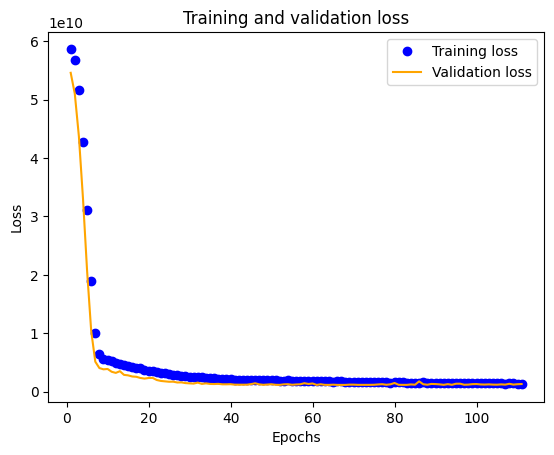

In [189]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # Numero de Epochs, para X
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


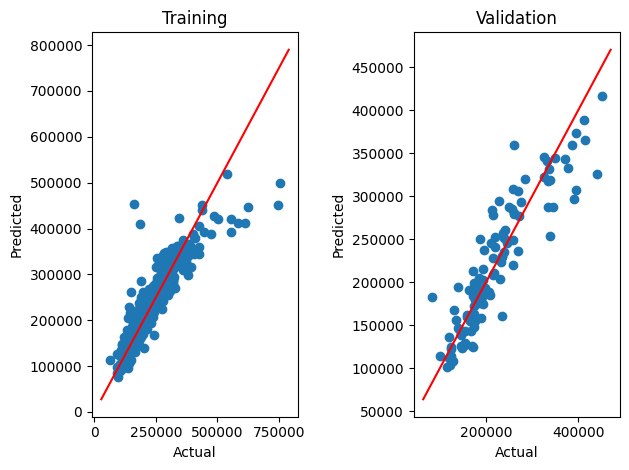

In [190]:
fig, axes = plt.subplots(1,2) # 1 fila, dos columnas


# Entrenamiento
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# Linea de 45 grados
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validacion
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# Linea de 45 grados
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')
# Pequeña separación entre gráficas.
fig.tight_layout()




In [191]:

pred = model.predict(X_test)
pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[287219.3  ],
       [305814.84 ],
       [194229.19 ],
       [325752.94 ],
       [148285.73 ],
       [344661.5  ],
       [245665.3  ],
       [108204.984],
       [175086.97 ],
       [228638.9  ],
       [388313.16 ],
       [343843.78 ],
       [281160.3  ],
       [158400.14 ],
       [101545.66 ],
       [143173.64 ],
       [307542.34 ],
       [373479.1  ],
       [213220.1  ],
       [114874.8  ],
       [163566.03 ],
       [297215.53 ],
       [277266.4  ],
       [345332.22 ],
       [229291.36 ],
       [187895.28 ],
       [360170.25 ],
       [211305.53 ],
       [182799.22 ],
       [147313.47 ],
       [162082.75 ],
       [257261.02 ],
       [294329.25 ],
       [167347.92 ],
       [365118.9  ],
       [199372.3  ],
       [126610.266],
       [188063.75 ],
       [145601.56 ],
       [341013.44 ],
       [190049.8  ],
       [183779.17 ],
       [252323.28 ],
       [417179.4  ],
       [184700.3  ],
       [237449.25 ],
       [112478.64 ],
       [13634

In [192]:


trainpreds = model.predict(X_train)

print("MAE Entrenamiento: ",mean_absolute_error(y_train, trainpreds)) # Entrenamiento
print("MAE Prueba: ",mean_absolute_error(y_test, pred)) # Prueba

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE Entrenamiento:  25507.887262446468
MAE Prueba:  24726.579460470086


In [193]:
mse = mean_squared_error(y_test, pred)
print("MSE: ",mse)

MSE:  1168035004.8650966


In [194]:
r2 = r2_score(y_test, pred)
print("R²: ", r2)


R²:  0.8209359718421861
